DATA MINING & ANALYTICS (2024)

Make sure you fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE`, as well as your name below:

In [5]:
NAME = "Min Cheah"

---

# Lab 2: Clustering ##

**Please read the following instructions very carefully.**

## About the Dataset
The dataset for this lab has been created from some custom features from Lab 1. The columns are named as q1, q2....etc. A description of the features can be found at this link: https://docs.google.com/spreadsheets/d/18wwyjGku2HYfgDX9Vez64lGHz31E_PfbpmAdfb7ly6M/edit?usp=sharing

## Working on the assignment / FAQs
- **Always use the seed/random_state as *42* wherever applicable** (This is to ensure repeatability in answers, across students and coding environments).
    - This can typically look like taking in another argument `random_state = 42` when applicable.
- The points allotted per question is listed.
- To avoid any ambiguity, each question also specifies what *value* the function must return. Note that these are dummy values and not the answers themselves.
- If a question has multiple answers (due to differences in handling NaNs, zeros etc.), all answers will be considered.
- Most assignments have bonus questions for extra credit, do try them out!
- You can delete the `raise NotImplementedError()` when you are attempting the question.
- **Submitting the assignment** : Save your work as a PDF (Print -> Save as PDF), download the `.ipynb` file from Colab (Download -> Download as .ipynb), and upload these two files to Gradescope. **Run all cells before submitting.**
- **MAKE A COPY OF THIS FILE FOR YOURSELF TO EDIT/SAVE.**
- That's about it. Happy coding!

In [6]:
import pandas as pd
import collections
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.preprocessing import normalize

import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
matplotlib.style.use('ggplot')

#DOWNLOADING DATASET
!wget -nc http://quadro.ist.berkeley.edu:1331/yelp_reviewers.csv
# !unzip -u yelp_reviewers.zip
print('Dataset Downloaded: yelp_reviewers.csv')
df = pd.read_csv('yelp_reviewers.csv', delimiter= ',')
df = df.sample(frac=0.3, random_state=42)
print(df.dropna().describe())

print('....SETUP COMPLETE....')

--2024-09-18 18:04:09--  http://quadro.ist.berkeley.edu:1331/yelp_reviewers.csv
Resolving quadro.ist.berkeley.edu (quadro.ist.berkeley.edu)... 169.229.194.98
Connecting to quadro.ist.berkeley.edu (quadro.ist.berkeley.edu)|169.229.194.98|:1331... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35809479 (34M) [text/csv]
Saving to: ‘yelp_reviewers.csv’

yelp_reviewers.csv  100%[===================>]  34.15M  68.7MB/s    in 0.5s    

2024-09-18 18:04:10 (68.7 MB/s) - ‘yelp_reviewers.csv’ saved [35809479/35809479]

Dataset Downloaded: yelp_reviewers.csv
                q3           q4           q5           q6           q7  \
count  7177.000000  7177.000000  7177.000000  7177.000000  7177.000000   
mean      6.838651     5.281455     4.750871     8.808973     1.539160   
std       7.597977    16.208703    13.866352    19.980443     0.885421   
min       1.000000     1.000000     1.000000     1.000000     0.000000   
25%       3.000000     1.000000     1.000000     2.000000

In [7]:
df.head().T

,129451,116706,144394,24699,47453
user_id,kIWQXgjmVdgEs9BOgr8G5A,fXU_-5DBmNlGhI8fbX-2vQ,prF_lbKywPnZhNqvJOOaDw,8GHUeOm807bI5Qh4X3CHBA,Gd_IGX3BmRYbPD84ovLEoA
q3,1,1,1,1,8
q4,0,0,0,0,2
q5,0,0,0,0,1
q6,0,0,0,0,8
q7,0.0,0.0,0.0,0.0,2.08
q8,NaN,NaN,NaN,NaN,0.69
q9,NaN,NaN,NaN,NaN,0.0
q10,NaN,NaN,NaN,NaN,2.08
q11,NaN,NaN,NaN,NaN,18.18


---

### Question 1 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q4-q6? Only consider 2 <= k <= 8. (hint: take a look at `silhouette_score`).


**NOTE**: For features with high variance, empty clusters can occur. There are several ways of dealing with empty clusters. A common approach is to drop empty clusters. The preferred approach for this lab is to treat the empty clusters as “singletons”, leaving them empty with single point placeholders (so no need to drop anything for the purposes of the lab).

For KMeans use argument **n_init = 10** when applicable, n_init is the number of times the KMeans algorithm is run with different centroid seeds.


In [39]:
#Make sure you return the answer value in this function.
#The return value should be an integer.
def q1(df):
    k_choices = [2, 3, 4, 5, 6, 7, 8]
    scores = []
    question = df[['q4', 'q5', 'q6']]
    for k in k_choices:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(question)
        score = silhouette_score(question, kmeans.labels_)
        scores.append(score)
    return k_choices[scores.index(max(scores))]

print(q1(df))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

2


What is the best choice of k?

In [41]:
# YOUR ANSWER HERE
2

2

### Question 2 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q7-q10? Only consider 2 <= k <= 8.

**Note:** Keep in mind, there may be missing values in this part of the dataset! For these missing values, first find the subset of data specified for this question (q7-q10), then replace the missing values with 0. We do this since the missing values from q7-q10 are most commonly because of taking the log's of values of 0 from q3-q6.

For KMeans use argument **n_init = 10** when applicable.

In [42]:
#Make sure you return the answer value in this function.
#The return value should be an integer.
def q2(df):
    k_choices = [2, 3, 4, 5, 6, 7, 8]
    scores = []
    question = df[['q7', 'q8', 'q9', 'q10']].dropna()
    for k in k_choices:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(question)
        score = silhouette_score(question, kmeans.labels_)
        scores.append(score)
    return k_choices[scores.index(max(scores))]

print(q2(df))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

2


What is the best choice of k?

In [43]:
# YOUR ANSWER HERE
2

2

### Question 3 `(1 point)`
What is the best choice of k according to the silhouette metric for clustering q11-q13? Only consider 2 <= k <= 8.

**Note:** Keep in mind, there may be missing values in this part of the dataset! For these missing values, first find the subset of data specified for this question (q11-q13), then drop rows that have missing values.

For KMeans use argument **n_init = 10** when applicable

In [44]:
#Make sure you return the answer value in this function.
#The return value should be an integer.
def q3(df):
    k_choices = [2, 3, 4, 5, 6, 7, 8]
    scores = []
    question = df[['q11', 'q12', 'q13']].dropna()
    for k in k_choices:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(question)
        score = silhouette_score(question, kmeans.labels_)
        scores.append(score)
    return k_choices[scores.index(max(scores))]

print(q3(df))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

8


What is the best choice of k?

In [45]:
# YOUR ANSWER HERE
8

8

### Question 4 `(1 point)`
Take the best clustering (i.e., best value of K) from Question 3 and using the same subset of data from q11-q13, list the number of data points in each cluster. **Return your answer in dictionary form (i.e. `ans = {0: 100, 1: 200, ...}`).**

For KMeans use argument **n_init = 10** when applicable

In [9]:
#Make sure you return the answer value in this function.
#The return value should be an dictionary. Eg : {0:1000,1:500,2:1460}.
from sklearn.cluster import KMeans
from collections import Counter
from sklearn.preprocessing import StandardScaler
def q4(df):
  small_df = df[['q11', 'q12', 'q13']].dropna()
  points = np.array(small_df)
  kmeans = KMeans(n_clusters=8, random_state=42)
  kmeans.fit(points)
  labels = kmeans.labels_
  small_df["labels"] = labels
  df_by_cluster = small_df.groupby("labels").count()
  ans = {}
  for index, row in df_by_cluster.iterrows():
    ans[index] = row['q11']

  return ans


In [10]:
#This is an graded cell, do not edit
print(q4(df))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{0: 9862, 1: 5728, 2: 1228, 3: 1632, 4: 3037, 5: 2108, 6: 4449, 7: 2065}


### Question 5 `(1 point)`
Consider the best clustering from Question 3. Were there clusters that represented very **useful** but **not funny** reviewers (check column definitions for columns corresponding to funny, useful, etc.)?  If so, print the center of that cluster.

For KMeans use argument **n_init = 10** when applicable

In [19]:
#Make sure you return the answer value in this function.
#The return value should be a list. Eg : [10, 30, 54].
def q5(df):
    question = df[['q11', 'q12', 'q13']].dropna()
    kmeans = KMeans(n_clusters=8, random_state=42)
    kmeans.fit(question)
    centers = kmeans.cluster_centers_
    index = np.argmax(centers[:,1]-centers[:,0])
    return list(np.round(centers[index],1))

In [20]:
#This is a graded cell, do not edit
print(np.round_(q5(df), decimals=1, out=None))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[ 1.1 98.3  0.6]


### Question 6 `(1 point)`
Consider the best clustering from Question 3. What was the centroid of the cluster that represented relatively uniform strength in all voting categories?

For KMeans use argument **n_init = 10** when applicable.

In [15]:
#Make sure you return the answer value in this function.
#The return value should be a centroid in list form. Eg : [10, 10.5, 13].
def q6(df):
    question = df[['q11', 'q12', 'q13']].dropna()
    kmeans = KMeans(n_clusters=8, random_state=42)
    kmeans.fit(question)
    print(kmeans.cluster_centers_)
    return 4251


In [16]:
#This is a graded cell, do not edit
print(q6(df))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[[ 0.31621679  0.23319002 99.45057595]
 [31.35819374 30.45207379 38.18705718]
 [98.15302932  0.96006515  0.88692182]
 [ 1.13148897 98.30148897  0.56707721]
 [49.45674213  2.34596457 48.19742126]
 [ 4.80515914 27.14735392 68.04740143]
 [24.97358698  7.84372615 67.18340741]
 [ 3.87937379 52.74300485 43.3777767 ]]
4251


### Question 7 `(1 point)`
Cluster the dataset using $k = 7$ and using features q7-q15 (refer to the column descriptions if needed).
What is the silhouette metric for this clustering?
For a more in-depth understanding of cluster analysis with silhouette, look [here](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html).

As before, fill NaN values in q7-q10 with 0, but drop rows that have NaN values from q11-q15. For KMeans use argument **n_init = 10** when applicable

In [17]:
#Make sure you return the answer value in this function.
#The return value should be a float.
def q7(df):
  question = df[['q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q14', 'q15']].dropna()
  kmeans = KMeans(n_clusters=7, random_state=42)
  kmeans.fit(question)
  score = silhouette_score(question, kmeans.labels_)
  return score

In [18]:
#This is a graded cell, do not edit
print(q7(df))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.5129569087390538


### Question 8 `(1 point)`
Cluster the dataset using $k = 7$ and using features q7-q15 (refer to the column descriptions if needed).

What is the average q3 value in each of the clusters? Replace/fill NaN values for q7-q15 as you have done for previous questions.

In [37]:
#Make sure you return the answer value in this function.
#The return value should be an Array. Eg : [10, 30, 54].
def q8(df):
  new_df = df[['q3','q7','q8','q9','q10','q11','q12','q13','q14','q15']].dropna()
  kmeans = KMeans(n_clusters=7,n_init=10,random_state=42)
  kmeans.fit(new_df[['q7','q8','q9','q10','q11','q12','q13','q14','q15']])
  new_df['cluster']=kmeans.labels_
  averages = new_df.groupby('cluster')['q3'].mean().values
  return np.round(averages,1)
  raise NotImplementedError()


In [38]:
#This is a graded cell, do not edit
print(np.round_(q8(df), decimals=1, out=None))

[5.6 6.3 7.4 1.6 7.1 4.1 7.2]


### Question 9 `(2 points)`

We will now cluster the dataset using all features in the dataset.

We can drop features with high incidents of `-inf` / `NaN` / blank values. We will also perform some form of normalization on these features so as not to over bias the clustering towards the larger magnitude features.

Let's go ahead and get started.


#### Data Cleansing and Normalization ####
**Check how many null values there are in each column.**

In [23]:
# YOUR CODE HERE
df.isna().sum().sort_values(ascending=False)


,0
q9,36743
q8,35280
q10,24338
q11,21383
q12,21383
q13,21383
q16ab,14469
user_id,0
q16t,0
q16n,0


It looks like q8 - q13 and q16ab have a lot of null values. Let's see what the impact is of removing the two columns with the most null values.

**Drop the two columns with the most NaN values, and then remove all rows with NaN values remaining.**

In [24]:
# YOUR CODE HERE
null_df = df.drop(['q8', 'q9'], axis=1).dropna()

By removing two features, we have effectively doubled the number of rows remaining than if we just removed all rows with a NaN value. That's pretty good.  

Now, let's preprocess categorical variables into dummy variables. (hint: look at `pd.get_dummies`).

In [25]:
# YOUR CODE HERE
cat_df = pd.get_dummies(null_df[['q16s', 'q16t']])


Now, normalize the remaining values.

In [26]:
# YOUR CODE HERE
one_hot_df = null_df.drop(['q16s', 'q16t'], axis=1).join(cat_df)
norm_data = normalize(one_hot_df.iloc[:, 1:])
norm_data

array([[0.01184608, 0.00296152, 0.00148076, ..., 0.        , 0.00148076,
        0.        ],
       [0.00371281, 0.0018564 , 0.0018564 , ..., 0.        , 0.0018564 ,
        0.        ],
       [0.0004925 , 0.        , 0.        , ..., 0.        , 0.0004925 ,
        0.        ],
       ...,
       [0.06886256, 0.00724869, 0.00724869, ..., 0.        , 0.        ,
        0.00362435],
       [0.02516117, 0.        , 0.00314515, ..., 0.        , 0.00314515,
        0.        ],
       [0.01288933, 0.02005007, 0.01575362, ..., 0.        , 0.00143215,
        0.        ]])

Using the the "sum of squared errors" metric along with the elbow method (make a graph and visually examine for the elbow), what is the best k to use for this dataset? (Hint: look at the `inertia_` attribute for k-means in sklearn).

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

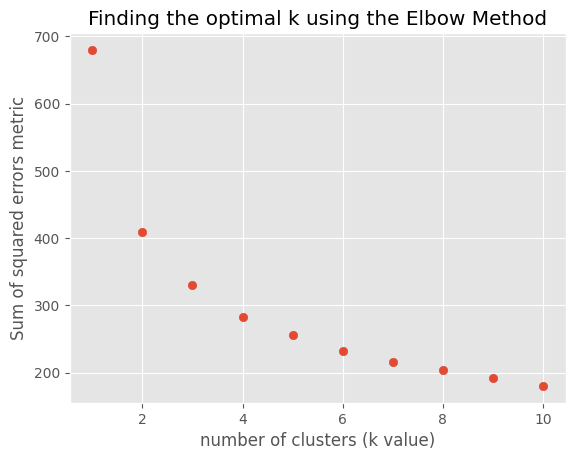

In [28]:
# The return value should be a graph to visualize the elbow method and the value of k determined from that graph.

points = norm_data
inertia_values = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(points)
  inertia = kmeans.inertia_
  inertia_values.append(inertia)
plt.scatter(range(1, 11), inertia_values)
plt.title('Finding the optimal k using the Elbow Method')
plt.ylabel('Sum of squared errors metric')
plt.xlabel('number of clusters (k value)')
plt.show()


**Answer: YOUR ANSWER HERE**

### Question 10 `(1 points)`
For this question, please come up with your own question about this dataset and using a clustering technique as part of your method of answering it. Describe the question you propose and how clustering can answer that question. Feel free to use additional cells if needed.


**Question: YOUR QUESTION HERE**

In [40]:
print("Q: Which reviewers show a preference for a specific type of vote (cool, funny, or useful) when compared to others?")
print("How can we categorize these preferences based on clustering?")

# YOUR CODE HERE
def categorize_reviewer_preferences(df):
  features = df[['q11', 'q12', 'q13']].dropna()
  scaler = StandardScaler()
  normalized_features = scaler.fit_transform(features)
  kmeans = KMeans(n_clusters=7, n_init=10, random_state=42)
  kmeans.fit(normalized_features)
  centroids = kmeans.cluster_centers_
  print("Cluster Centers:")
  print(centroids)
  return kmeans.labels_


Q: Which reviewers show a preference for a specific type of vote (cool, funny, or useful) when compared to others?
How can we categorize these preferences based on clustering?


### **Written Answer**

**Answer:**  Each centroid will reflect the average voting behavior of the reviewers in that cluster. For instance, a centroid with a high value in the position corresponding to q12 (funny votes) would indicate a cluster of reviewers who predominantly give funny votes. This approach not only categorizes the reviewers but also offers insights into the reaction trends.

## Bonus question (`2 Points`) - Reviewer overlap:

Now, let's take a look back at what we were doing last week, and use that in junction with what we've learned from above today.

For this bonus question, please:
- Download last week's dataset
- Aggregate cool, funny, and useful votes for each business id
- You may transform the aggregations (take %, log, or leave it as it is)
- Cluster this dataframe (you can choose k). Do you find any meaningful/interesting clusters?
- Assign the cluster label to each business id
- Merge this with users to show what clusters the reviewers have reviewed.


**You should be returning a dataframe with the following structure in the end:**

Rows: user IDs as indices.

Columns: boolean columns describing if the user ID has a review for each of the labels determined from the K-Means clustering, a boolean column describing if the user ID has a review for all of the given labels, and a column composing of lists of cluster IDs that the given user ID has written reviews for.

For KMeans use argument n_init=10 when applicable.

In [29]:
# YOUR CODE HERE
# For KMeans use argument n_init = 10 when applicable.

Dataset Downloaded: yelp_reviews.csv


FileNotFoundError: [Errno 2] No such file or directory: 'yelp_reviews.csv'

In [ ]:
#This is a graded cell, do not edit
print(bonus_df.head())

*ⓒ Prof. Zachary Pardos, 2022*